# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#11)
8. [References](12)

<a id="1"></a> 
# **Introduction**

Time series modeling applied to forecasting the groundwater depth of an aquifer is an invaluable tool for understanding and predicting changes in water levels over time. This methodology allows analyzing past trends, seasonal patterns and fluctuations in water depth, which is essential for the sustainable management of water resources and decision making in hydrological planning.

The depth of groundwater in an aquifer is a critical parameter for evaluating the availability and quality of groundwater, as well as for managing its exploitation efficiently. Changes in water levels can be influenced by various factors, such as precipitation, aquifer recharge, water pumping, and the geological characteristics of the area.

Time series modeling makes it possible to analyze and predict the evolution of groundwater depth using advanced statistical and mathematical techniques. These techniques include decomposition models, such as the STL (Seasonal and Trend decomposition using Loess) decomposition model, and time series models, such as the ARIMA (AutoRegressive Integrated Moving Average) model and its variants.

By applying these techniques, it is possible to identify long-term trends, seasonal patterns, and random fluctuations in groundwater depth. Additionally, external variables, such as climate data and pumping data, can be used to improve forecast accuracy and better understand aquifer dynamics.

The main objective of time series modeling applied to groundwater depth forecasting is to provide accurate and timely information on changes in water levels. This allows water managers to make informed decisions about water resource management, such as pumping scheduling, planning artificial aquifer recharge, and implementing water conservation measures.

In summary, time series modeling applied to forecasting the groundwater depth of an aquifer offers a powerful tool for understanding and predicting changes in water levels over time. This is essential for sustainable water resource management and informed decision making in hydrological planning. By using advanced statistical and mathematical techniques, it is possible to obtain accurate forecasts that help improve groundwater management and conservation for the benefit of communities and the environment.

<a id="2"></a>
# **Case study**

In this case study, we will explore how time series modeling can be applied to predict the depth of groundwater in an aquifer. We will use historical water depth data and apply advanced time series analysis techniques to develop a model that allows us to make accurate and useful forecasts for water resources management.

#### **Input data:**
We have a historical data set that records the depth of groundwater in an aquifer over a period of several years. Data was collected by measuring water levels in monitoring wells strategically located in the aquifer area. Each data record includes the date and the water depth measured in meters.

#### **Goals:**
Our goal is to develop a time series forecasting model that can predict the depth of groundwater in the aquifer based on historical data. We want to use this model to make short-term forecasts (e.g. weeks or months) and evaluate their accuracy compared to actual data.

We will use different techniques for analysis and forecasting:
- Exploratory data analysis.
- Data preparation.
- Model selection
- Training and predictions
- Validation and evaluation

Time series modeling applied to forecasting the depth of groundwater in an aquifer is a powerful tool for water resources management. By analyzing historical data, selecting and appropriately adjusting models, and evaluating forecast accuracy, we can obtain valuable information for decision-making in hydrological planning. The short-term forecasts generated by the model can help anticipate changes in water levels, allowing for more efficient and sustainable management of the aquifer. However, it is important to note that forecast accuracy is subject to data quality, model choice, and the inherent uncertainty in predicting future events. Therefore, it is advisable to continuously evaluate the model and update it periodically as new data becomes available. With proper implementation, time series modeling can significantly improve the forecasting capability and management of water resources in aquifers, benefiting both the communities that depend on these water sources and the environment.

## Importing Libraries

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

from statsmodels.tsa.stattools import adfuller

# Time
# ==============================================================================
from datetime import datetime, date
from datetime import timedelta

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFDAB9',  # #212946  '#99FFDE', '#ffde99', '#de99ff' # #212946  '#99FFDE', '#ffde99', '#de99ff'  'coral','#FFDAB9','yellowgreen','#6495ED'
    'axes.facecolor': '#FFDAB9',
    'savefig.facecolor': '#FFDAB9',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'black',  #2A3459
    'grid.linewidth': '1',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **About Dataset**

We will use groundwater data from an aquifer located in Petrignano, Italy to analyze and predict the depth of the groundwater.

Features:

- Rainfall: indicates the quantity of rain falling (mm)
- Temperature: indicates the temperature (°C)
- Volume: indicates the volume of water taken from the drinking water treatment plant (m 3 )
- Hydrometry: indicates the groundwater level (m)

Target:
- Depth to Groundwater: indicates the groundwater level (m from the ground floor)

[You can download the data here](https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Aquifer_Petrignano.csv)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Aquifer_Petrignano.csv",parse_dates=["Date"])
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [5]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [6]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In this case we are going to use pm2_5 as the target variable.

In [7]:
df["unique_id"]="1"
df=df.rename(columns={"date": "ds", "depth_to_groundwater": "y"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ds                4199 non-null   datetime64[ns]
 1   rainfall          4199 non-null   float64       
 2   y                 4172 non-null   float64       
 3   temperature       4199 non-null   float64       
 4   drainage_volume   4198 non-null   float64       
 5   river_hydrometry  4199 non-null   float64       
 6   unique_id         4199 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 229.8+ KB


<a id="3"></a>
# **Explore Data with the plot method**

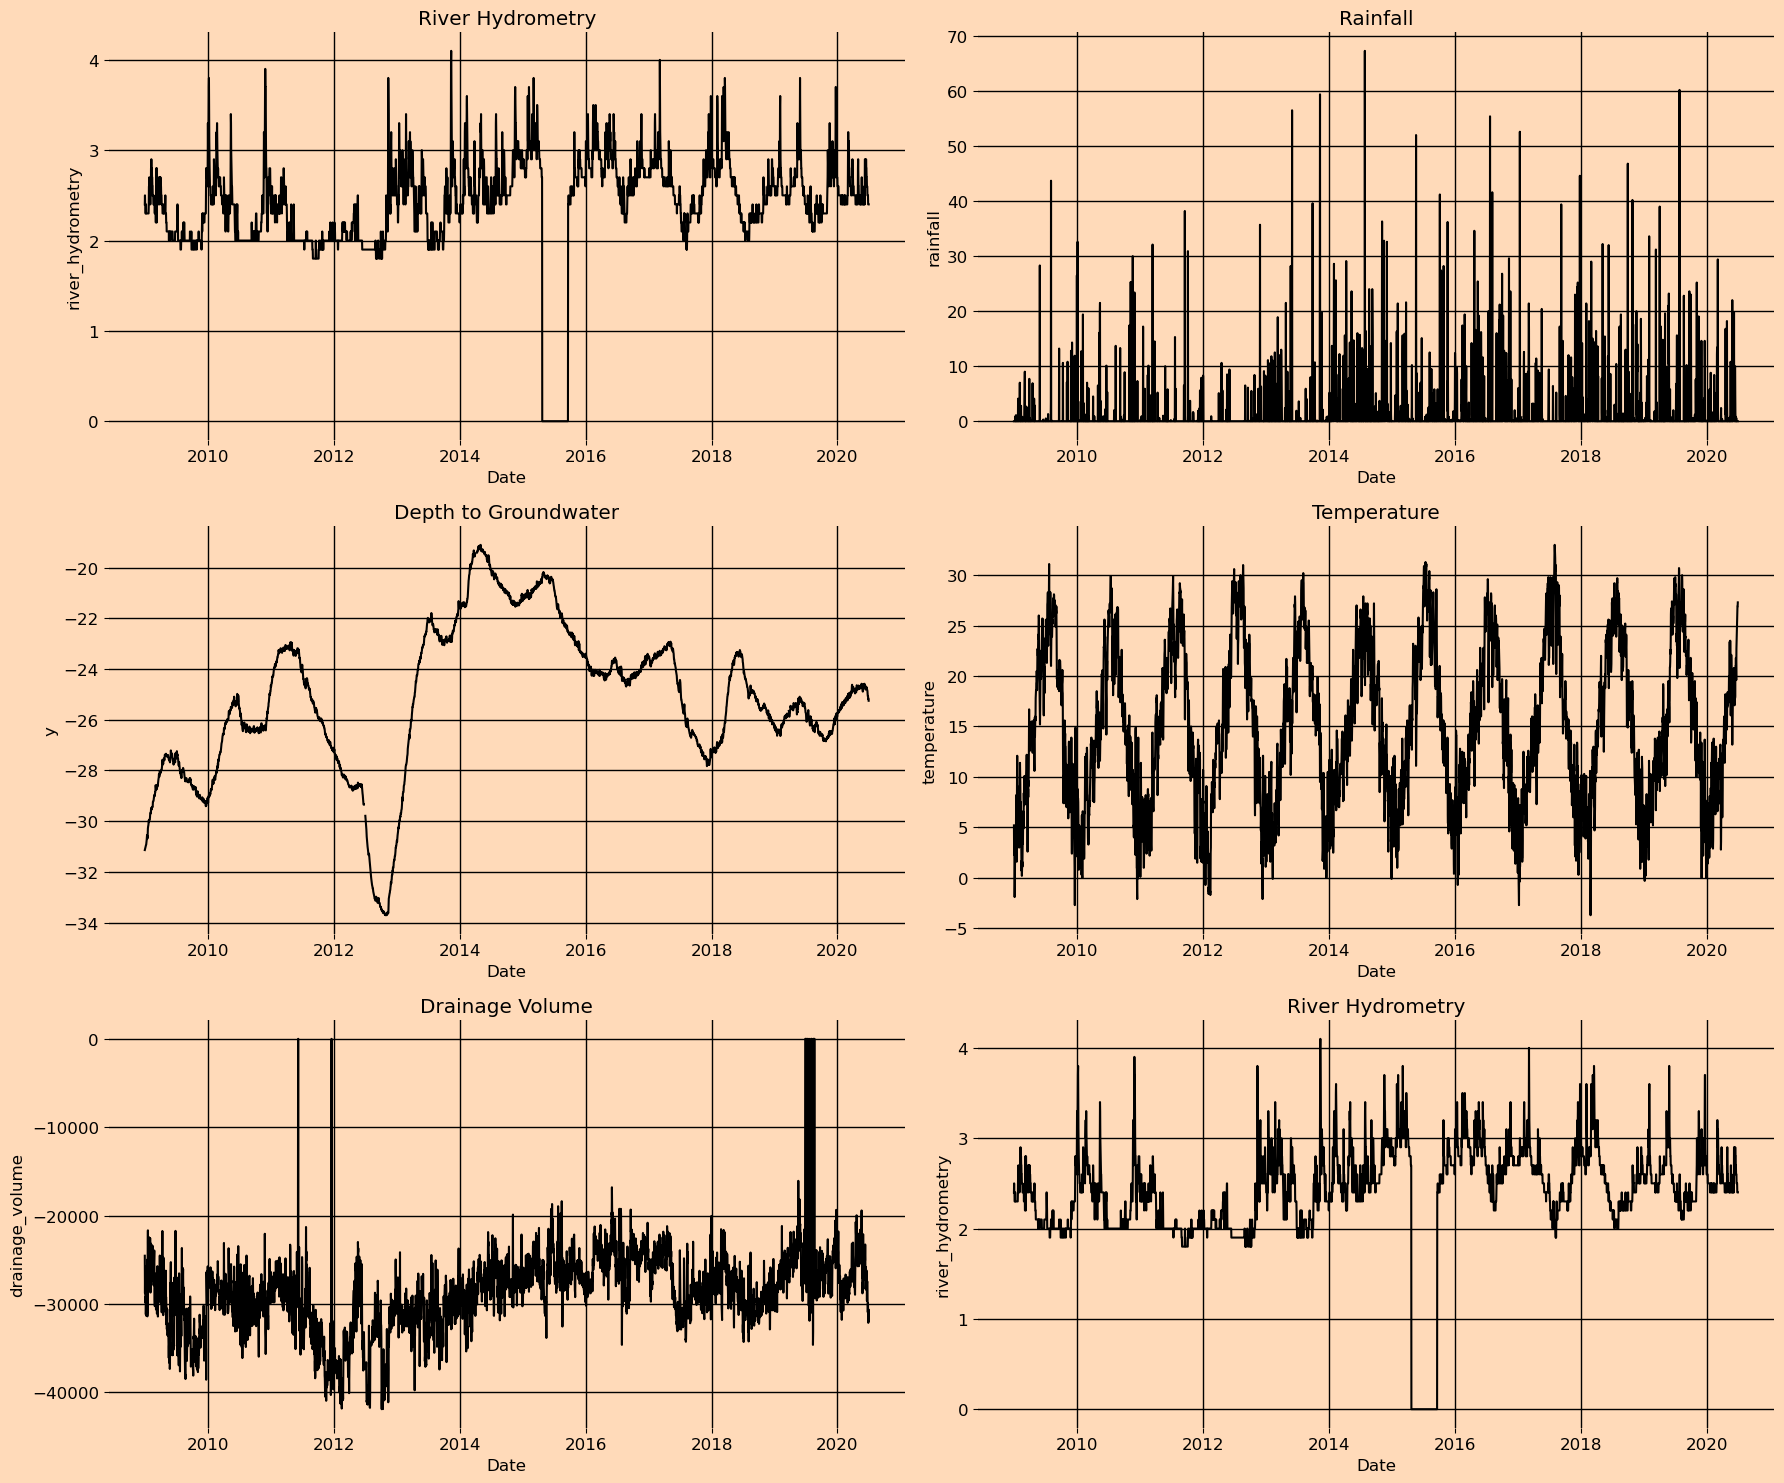

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

# Graficar cada variable en su respectivo subplot
variables = ['rainfall', 'y', 'temperature', 'drainage_volume', 'river_hydrometry']
titles = ['Rainfall', 'Depth to Groundwater', 'Temperature', 'Drainage Volume', 'River Hydrometry']

for i, ax in enumerate(axes.flatten()):
    var = variables[i-1]
    title = titles[i-1]
    ax.plot(df['ds'], df[var])
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(var)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Chronological Order and Equidistant Timestamps

The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

But, first of all, lets see how to check if our dataset is correctly formated!

In [10]:
df = df.sort_values(by='ds')

# Check time intervals
df['delta'] = df['ds'] - df['ds'].shift(1)

df[['ds', 'delta']].head()

,ds,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [11]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step.

In [12]:
df = df.drop('delta', axis=1)
df.isna().sum()

ds                   0
rainfall             0
y                   27
temperature          0
drainage_volume      1
river_hydrometry     0
unique_id            0
dtype: int64

(14245.0, 18443.0)

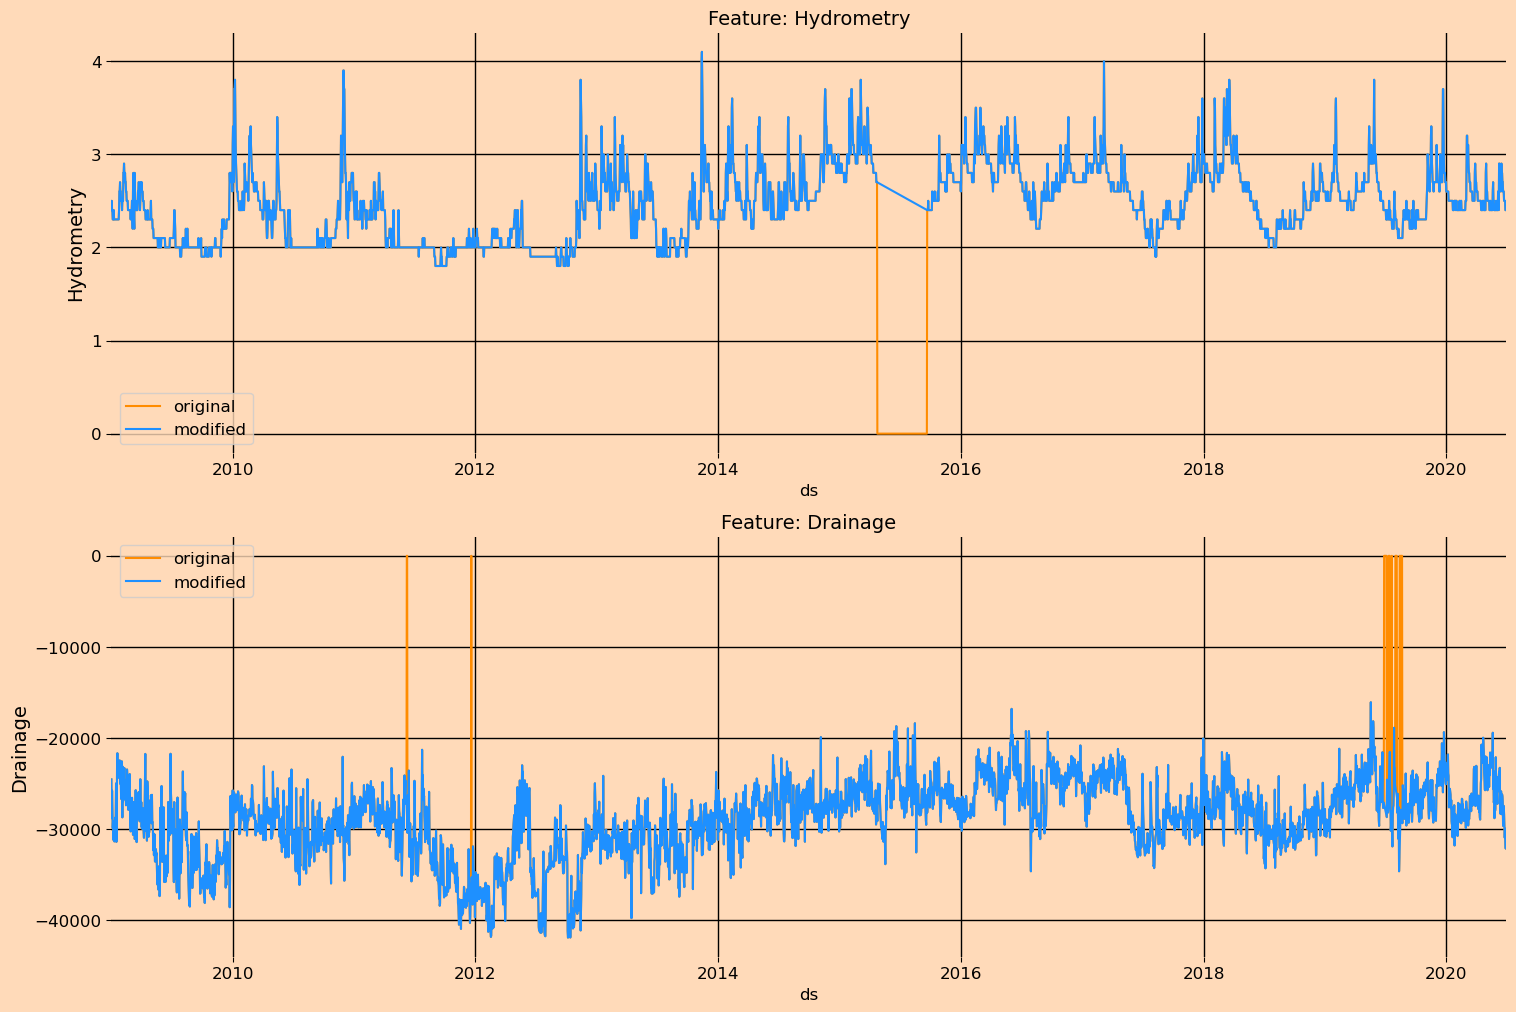

In [13]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['ds'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['ds'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['ds'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['ds'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

So now we have to fix missing values. Lets take a look of these cases and explore what can we do with them.

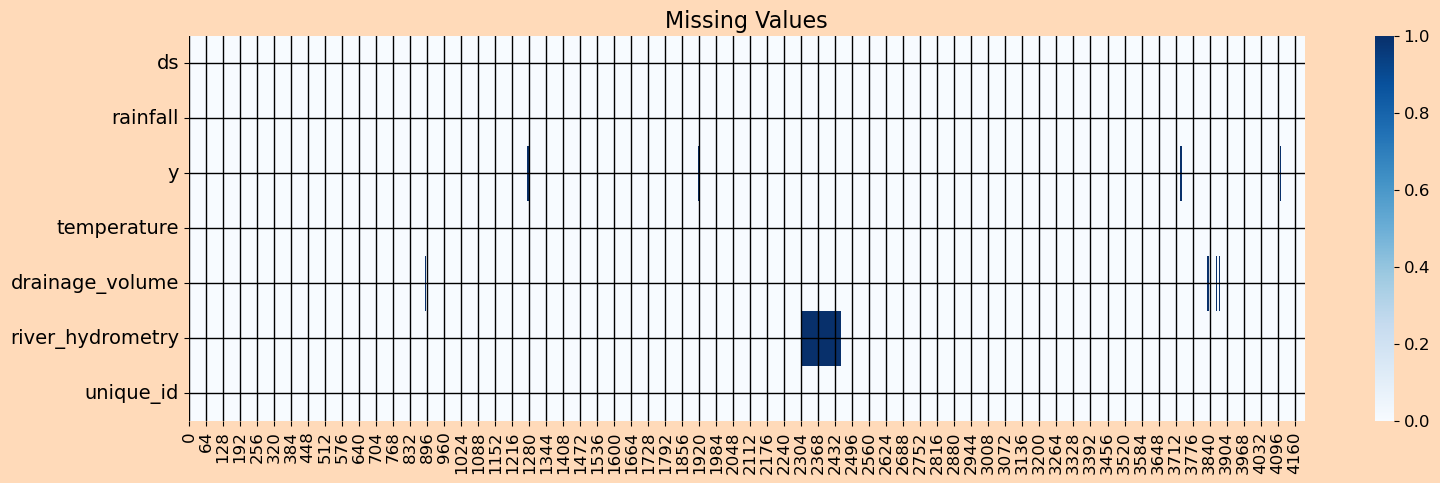

In [14]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

### Missing Values, how to handle

* **Option 1: Fill NaN with Outlier or Zero**

In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

* **Option 2: Fill NaN with Mean Value**

Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

* **Option 3: Fill NaN with Last Value with .ffill()**

Filling NaNs with the last value could be bit better.

* **Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()**

Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

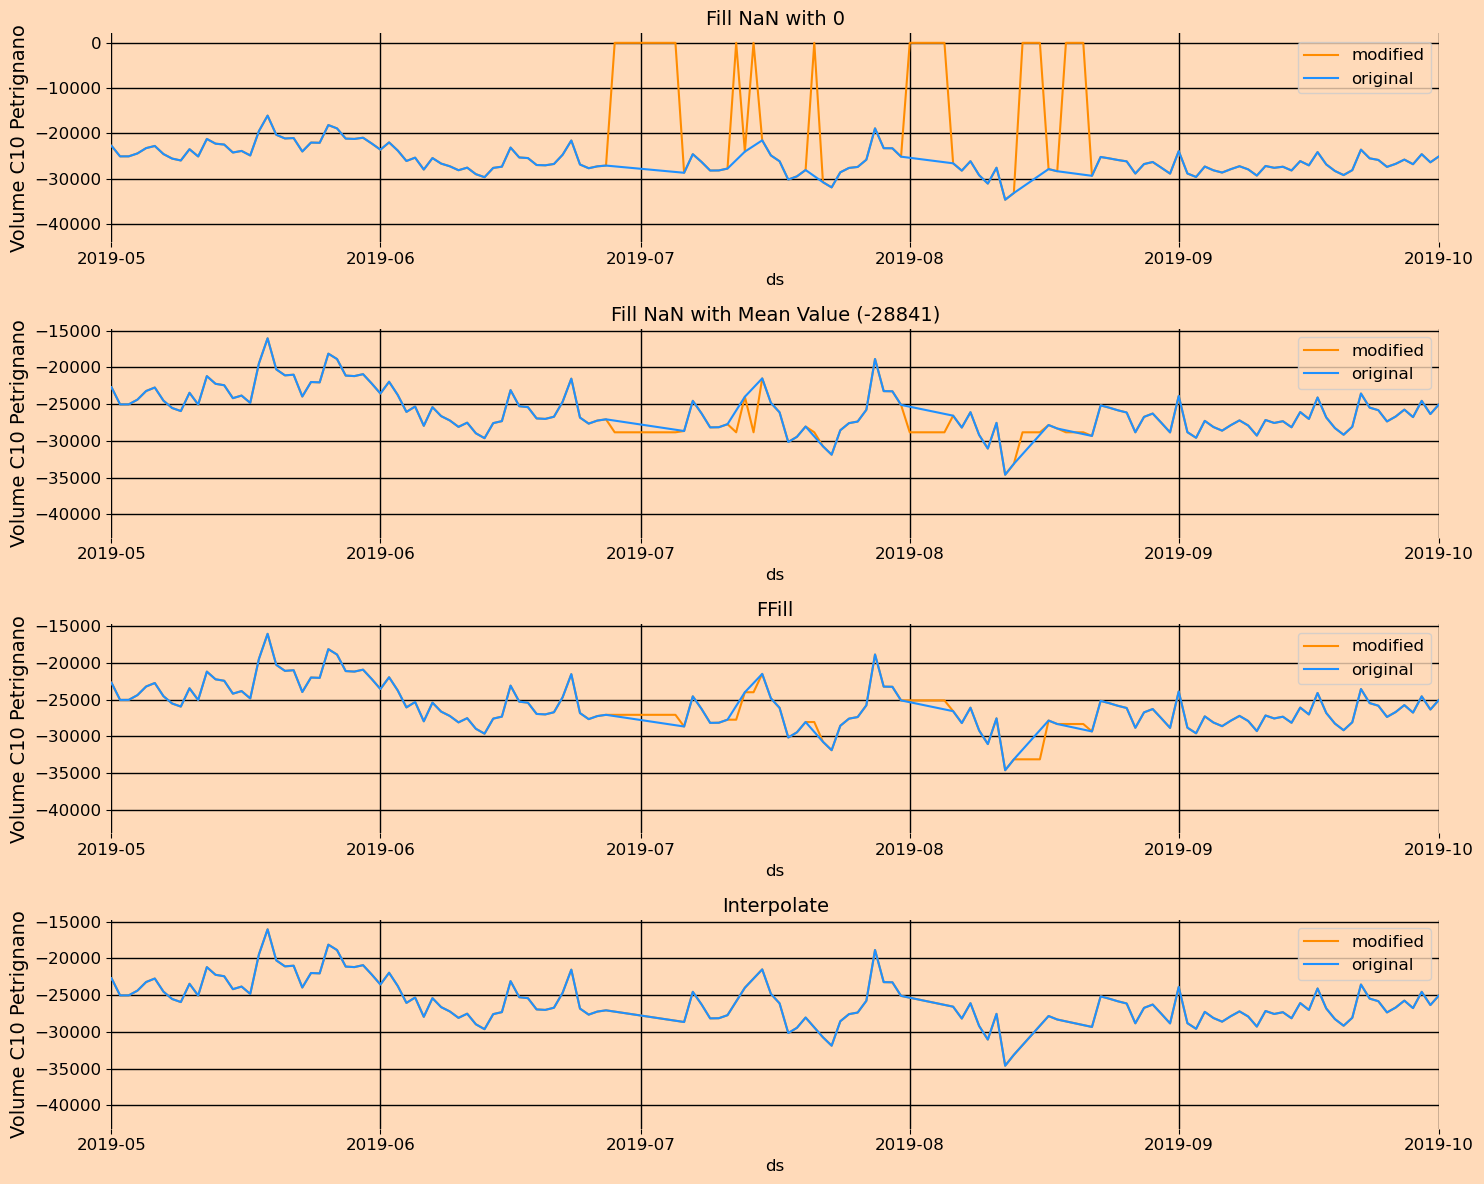

In [15]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['ds'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['ds'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['ds'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['ds'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['ds'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['ds'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['ds'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['ds'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

As we can see, the best option in this case, **seems to best option!**

So, lets interplota missing values

In [16]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['y'] = df['y'].interpolate()

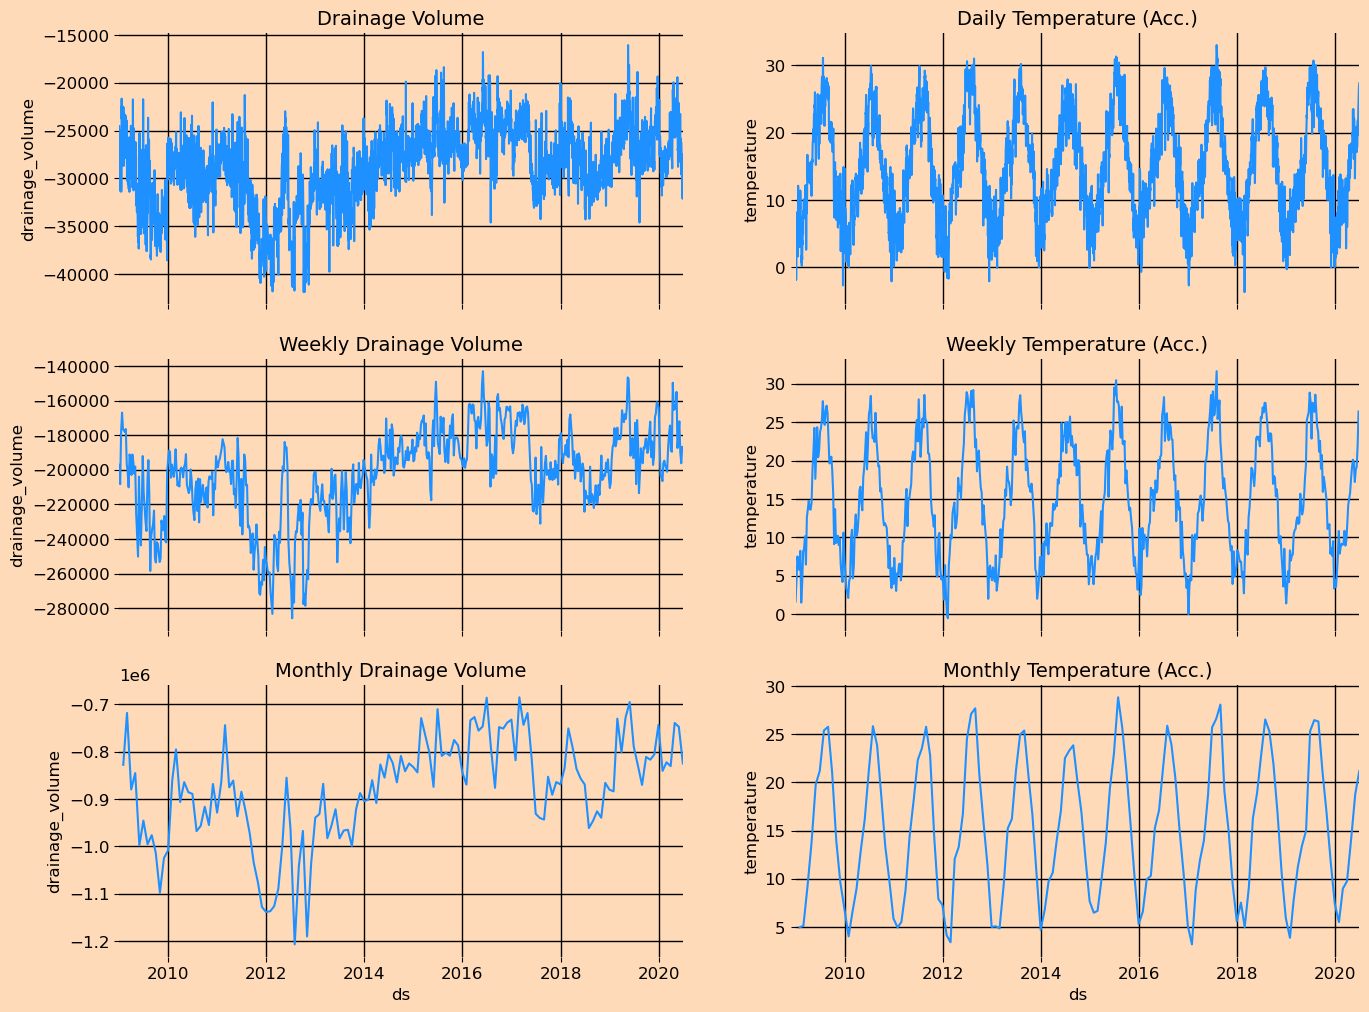

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(x=df['ds'], y=df['drainage_volume'], color='dodgerblue', ax=ax[0,0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['ds','drainage_volume']].resample('7D', on='ds').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['ds'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['ds','drainage_volume']].resample('M', on='ds').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['ds'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['ds'], y=df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['ds','temperature']].resample('7D', on='ds').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['ds'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['ds','temperature']].resample('M', on='ds').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['ds'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [18]:
# As we can see, downsample to weekly could smooth the data and hgelp with analysis
downsample = df[['ds',
                 'y', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='ds').mean().reset_index(drop=False)

df = downsample.copy()

The check for stationarity can be done via three different approaches:

1. **visually**: plot time series and check for trends or seasonality
2. **basic statistics**: split time series and compare the mean and variance of each partition
3. **statistical test**: Augmented Dickey Fuller test

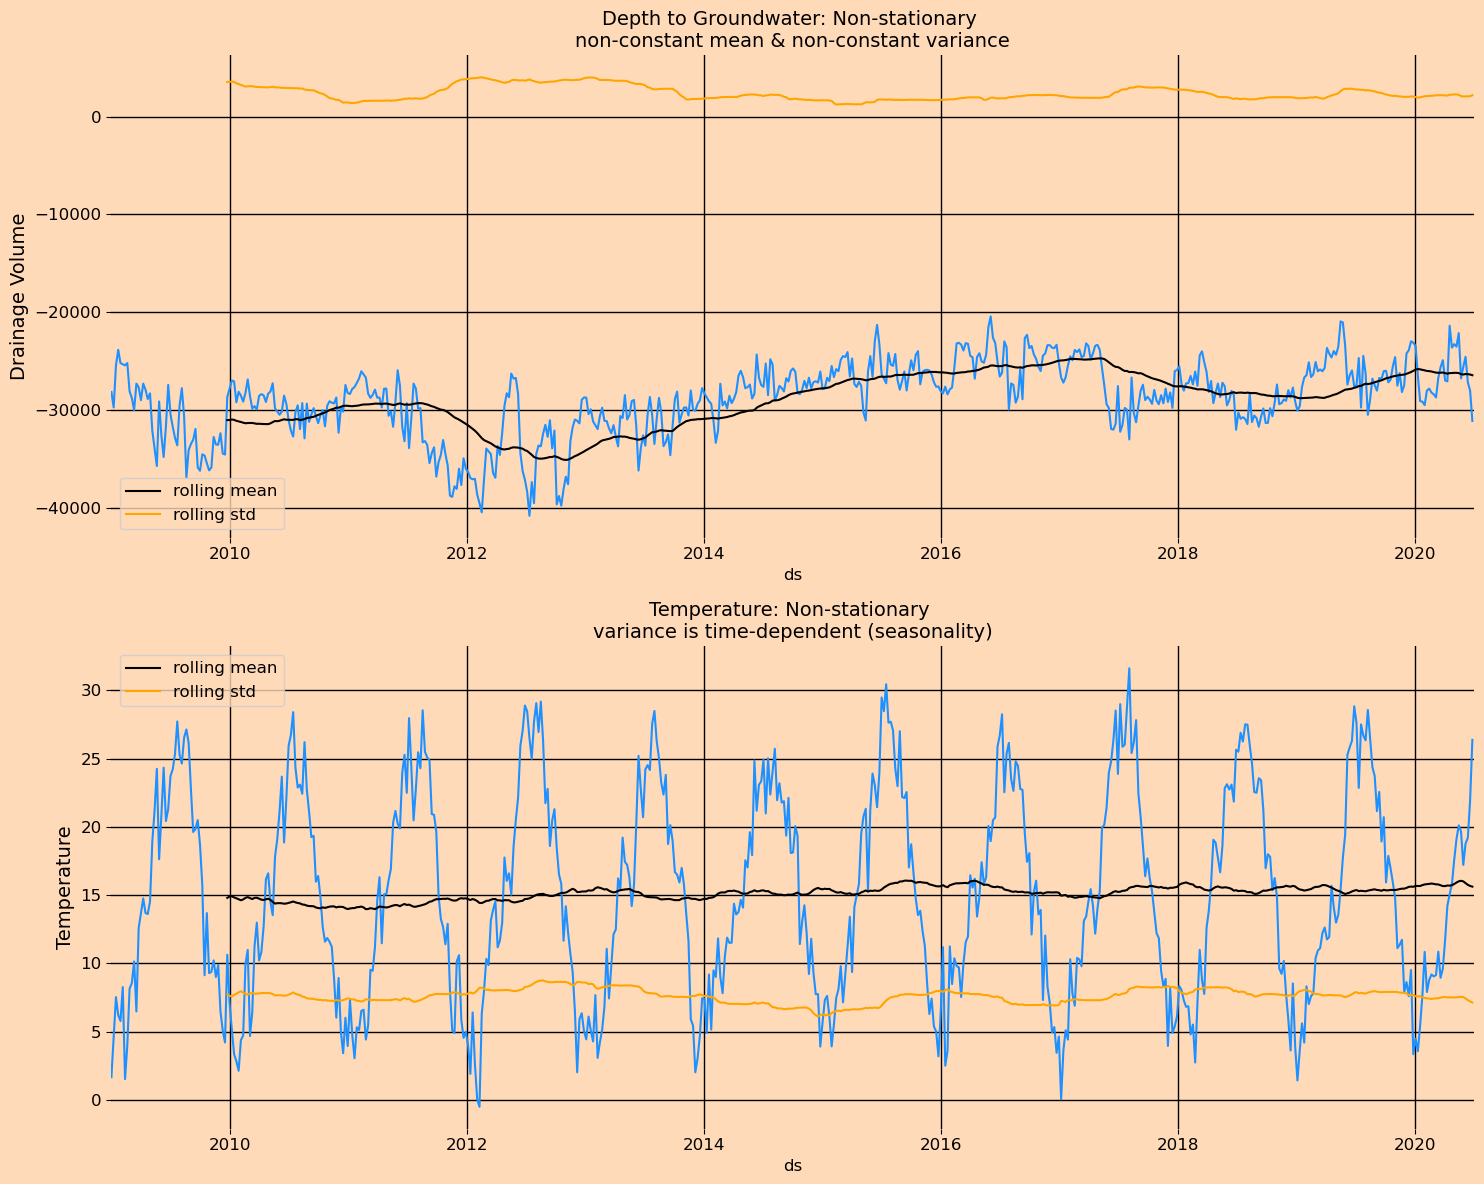

In [19]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['ds'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['ds'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['ds'], y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['ds'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['ds'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['ds'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In this **visual check**, we can see that the **features don't have constant mean and std**, but they are close to it.

In [20]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [21]:
Augmented_Dickey_Fuller_Test_func(df["y"],"water")

Dickey-Fuller test results for columns: water
Test Statistic                  -2.880202
p-value                          0.047699
No Lags Used                     7.000000
Number of observations used    592.000000
Critical Value (1%)             -3.441444
Critical Value (5%)             -2.866435
Critical Value (10%)            -2.569377
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


Now, we are going to check for each variable:
* The p-value is less than 0.05
* Check the range of the ADF statistic compared with critical_values 

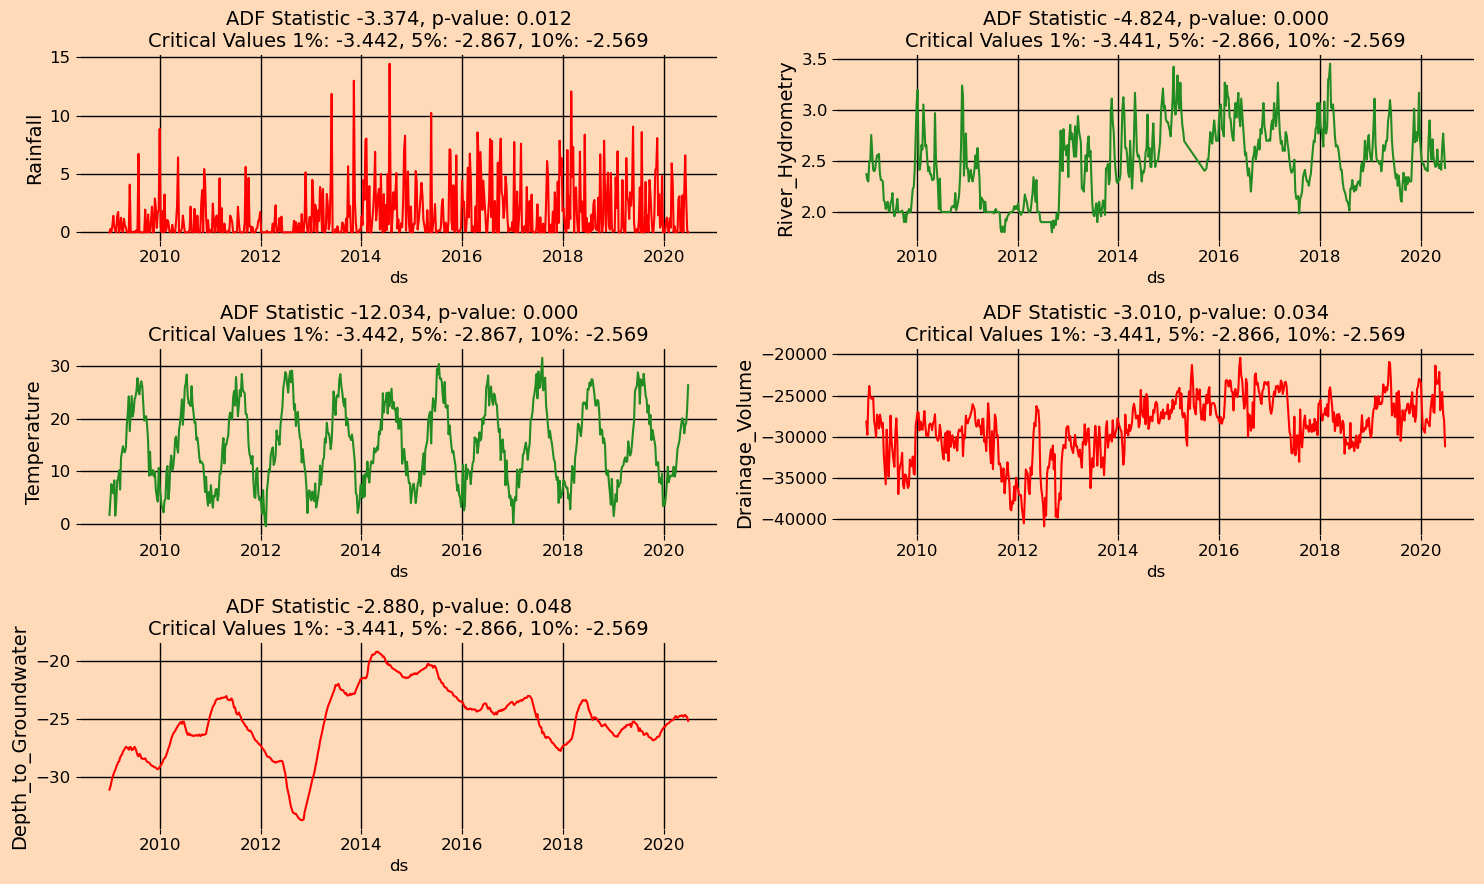

In [22]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'red'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'brown'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['ds'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['y'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

* **Transformation**: e.g. log or square root to stabilize non-constant variance
* **Differencing**: subtracts the current value from the previous

<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

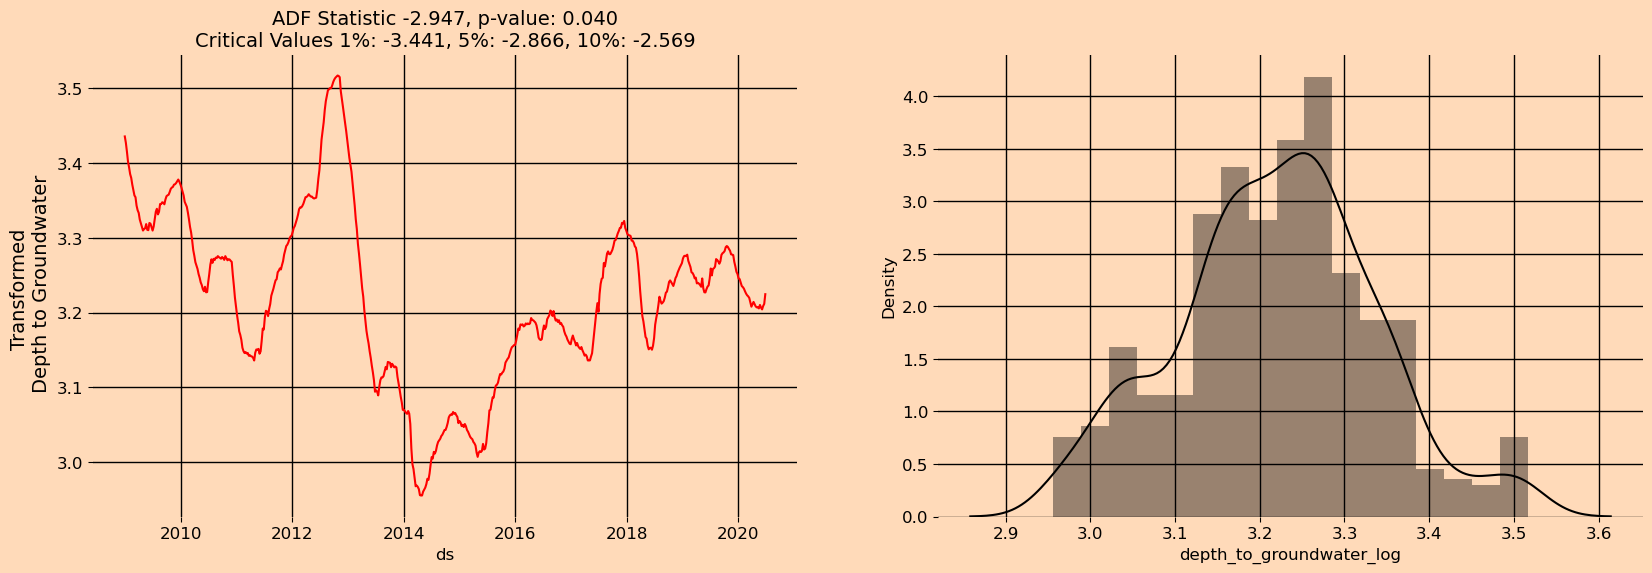

In [23]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['depth_to_groundwater_log'] = np.log(abs(df['y']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df['depth_to_groundwater_log'], ax=ax[1])

Differencing can be done in different orders:
* First order differencing: linear trends with $z_i = y_i - y_{i-1}$
* Second-order differencing: quadratic trends with $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
* and so on...

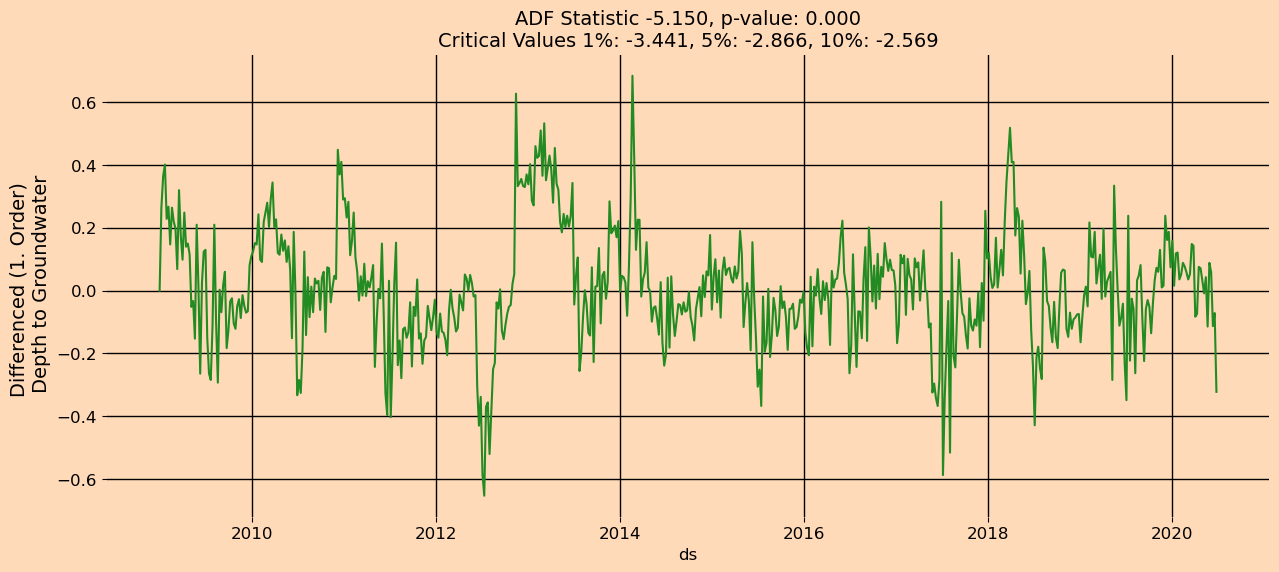

In [24]:
# First Order Differencing
ts_diff = np.diff(df['y'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

## TimeSeries Decomposition

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

* **Level**: The average value in the series.
* **Trend**: The increasing or decreasing value in the series.
* **Seasonality**: The repeating short-term cycle in the series.
* **Noise**: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:
* **Additive**: $y(t) = Level + Trend + Seasonality + Noise$
* **Multiplicative**: $y(t) = Level * Trend * Seasonality * Noise$

In this case we are going to use function seasonal_decompose() from the [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) library.

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'y'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

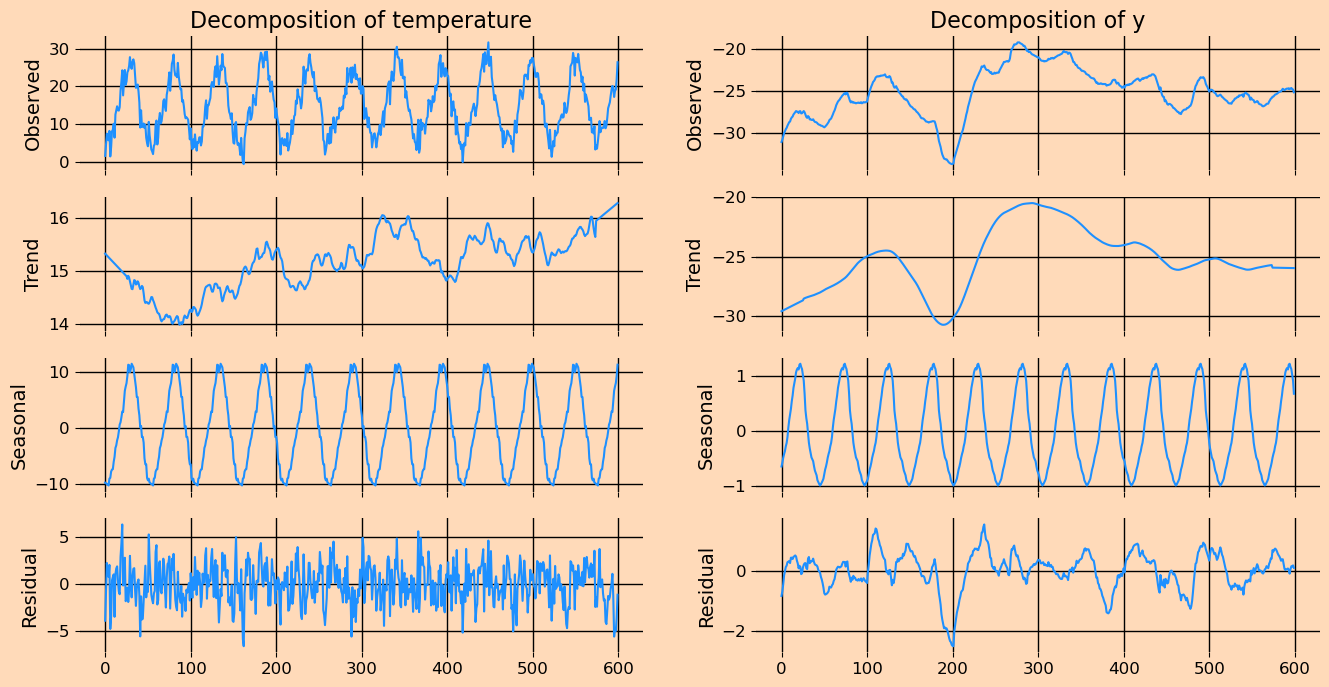

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'y']):
    
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

## Lag


We want to calculate each variable with a `shift()` (lag) to compare the correlationwith the other variables.

You can see [documentation of shift function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) for more information.

In [27]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

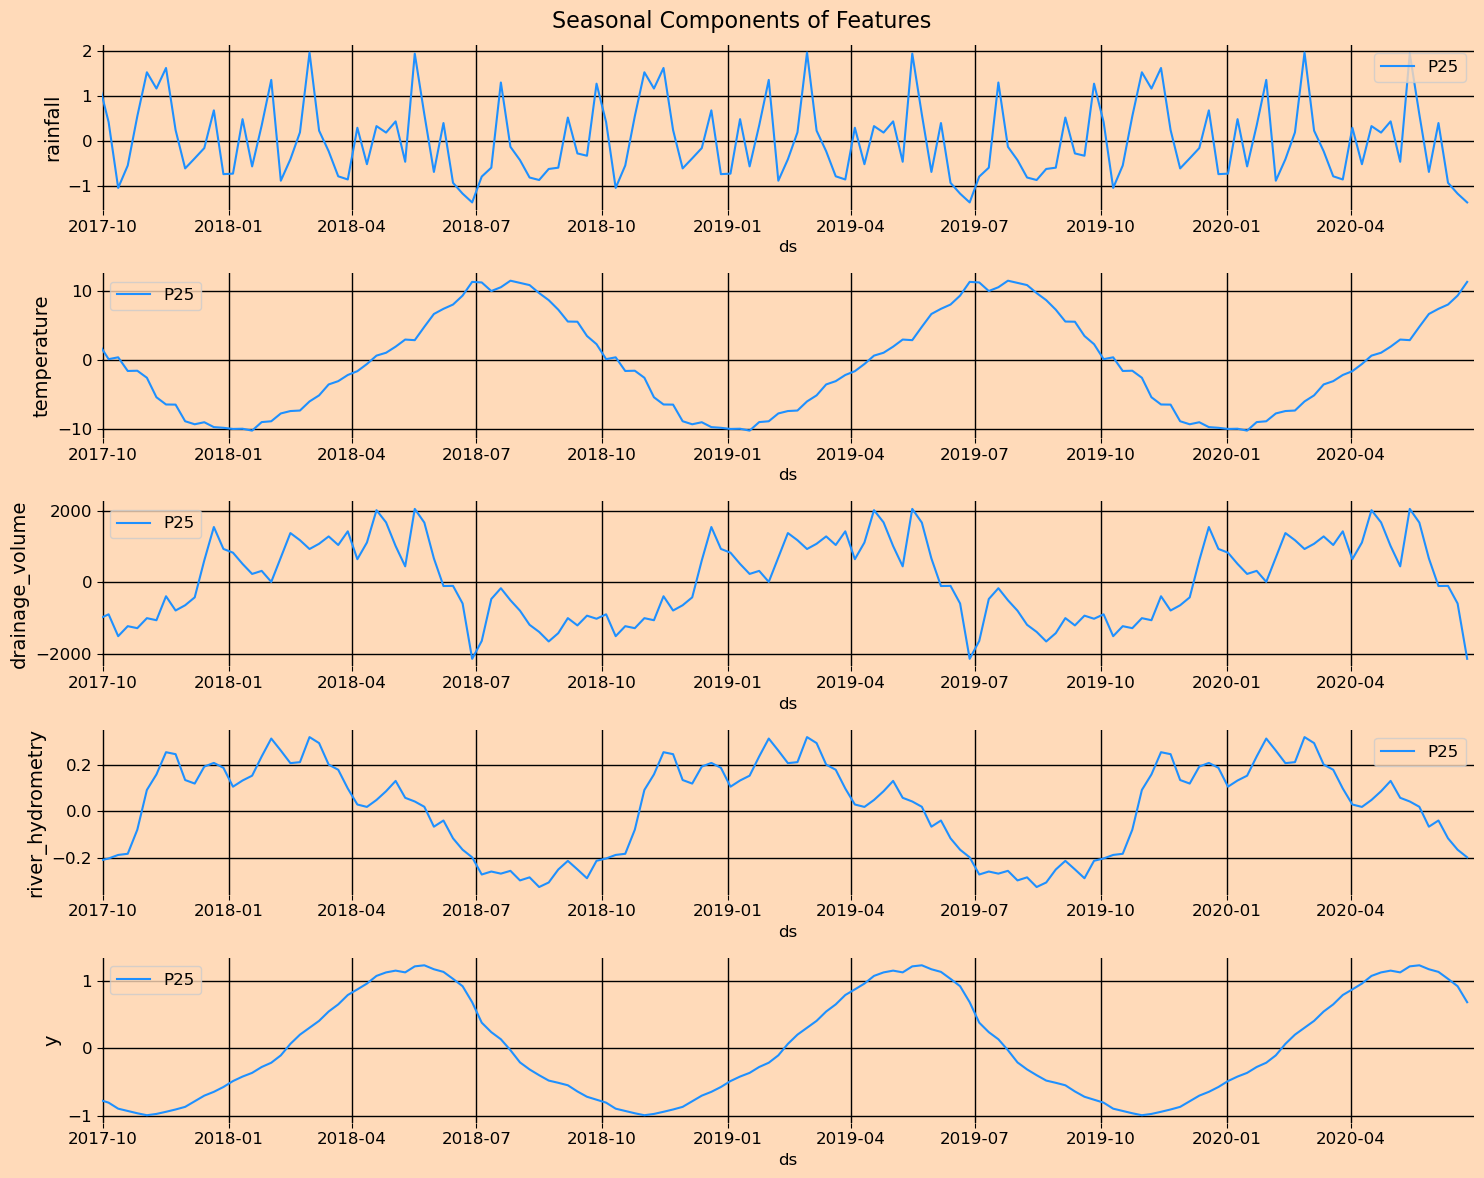

In [28]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['ds'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

As we can see:
* **depth_to_groundwater**: reaches its maximum around May/June and its minimum around November
* **temperature**: reaches its maxmium around August and its minimum around January
* **drainage_volume**: reaches its minimum around July.
* **river_hydrometry**: reaches its maximum around February/March and its minimum around September

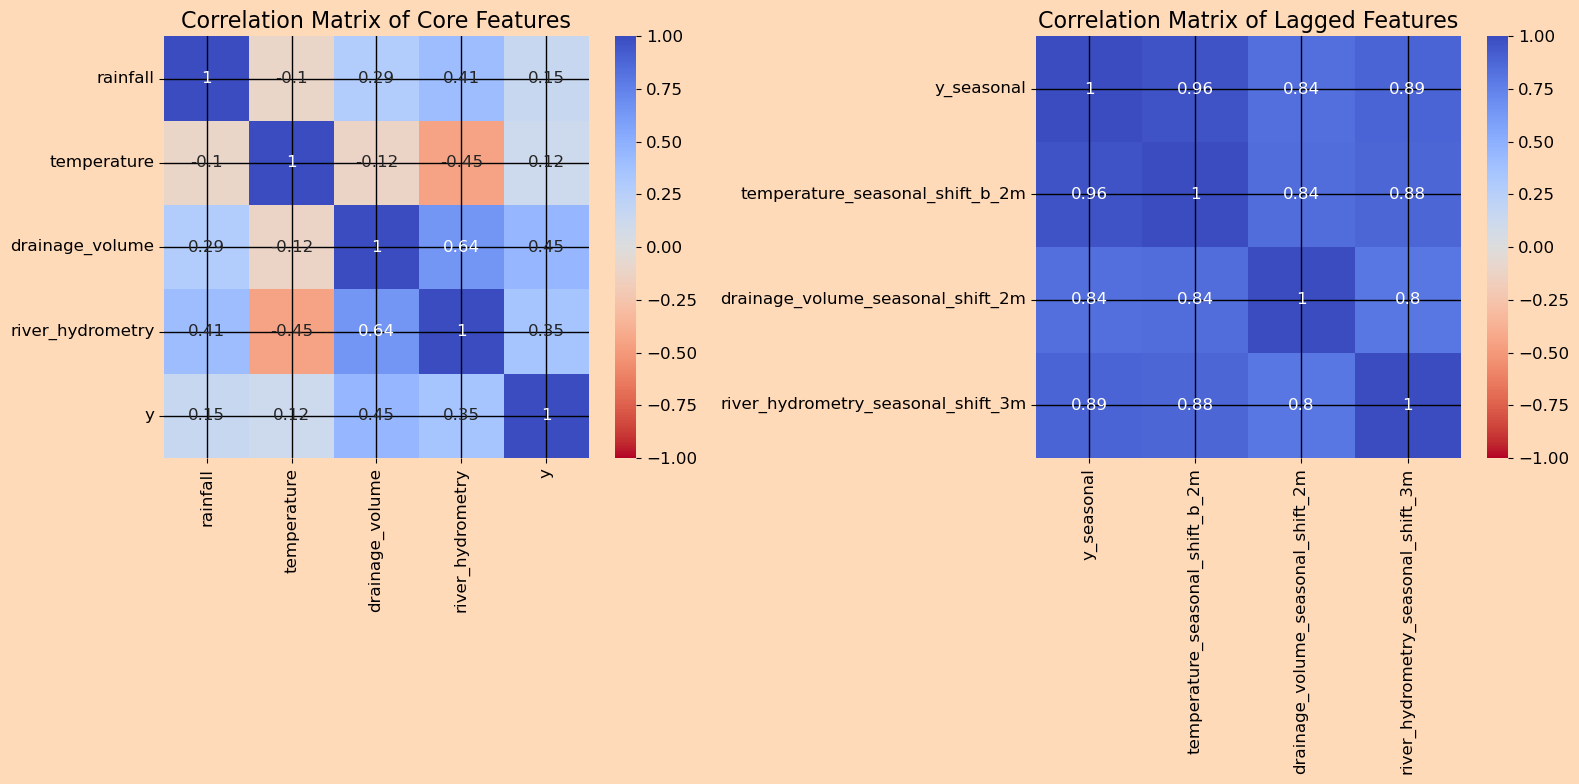

In [29]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'y_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

As we can see, the features are higher correlated in the case of shifted features (lagged ones) than the original ones.

## Autocorrelation Analysis

ACF and PACF plots: After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. Of course, with software like Statgraphics, you could just try some different combinations of terms and see what works best. But there is a more systematic way to do this. By looking at the **autocorrelation function (ACF)** and **partial autocorrelation (PACF)** plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

* **Autocorrelation Function (ACF)**: P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter
* **Partial Autocorrelation Function (PACF)**: D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary. D corresponds with AR parameter.

Autocorrelation plots help in detecting seasonality.

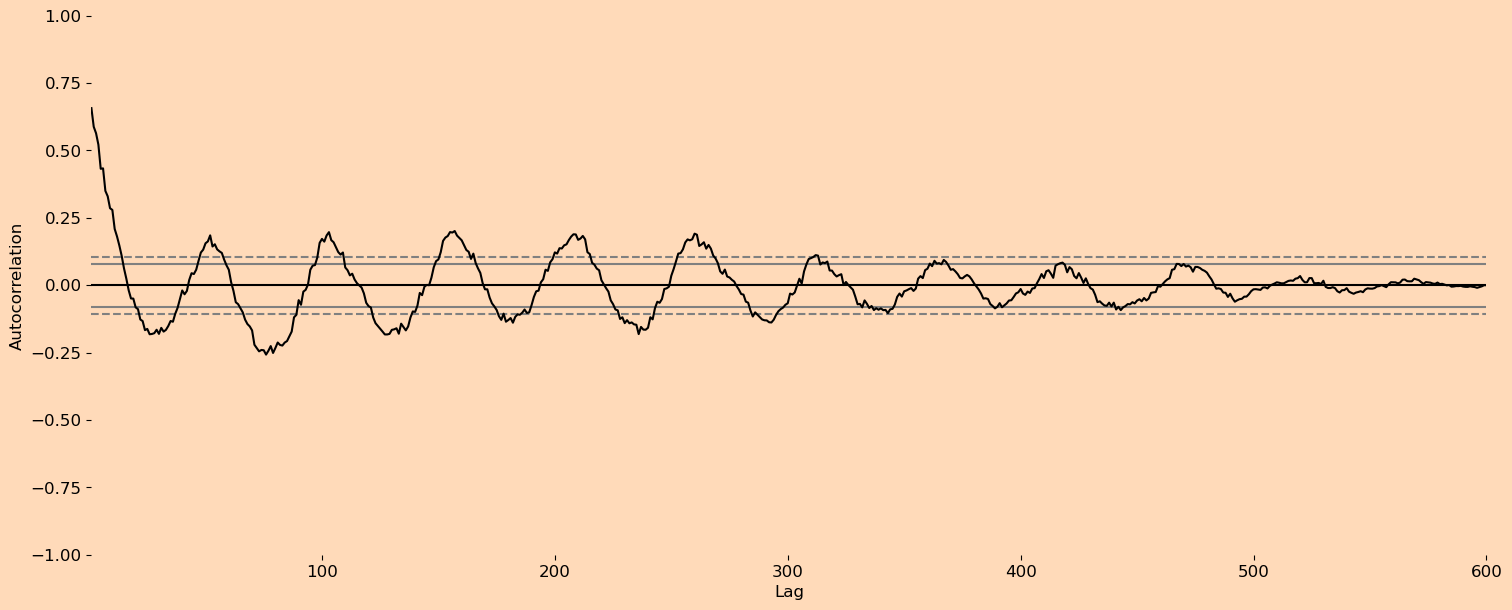

In [30]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])
plt.show()

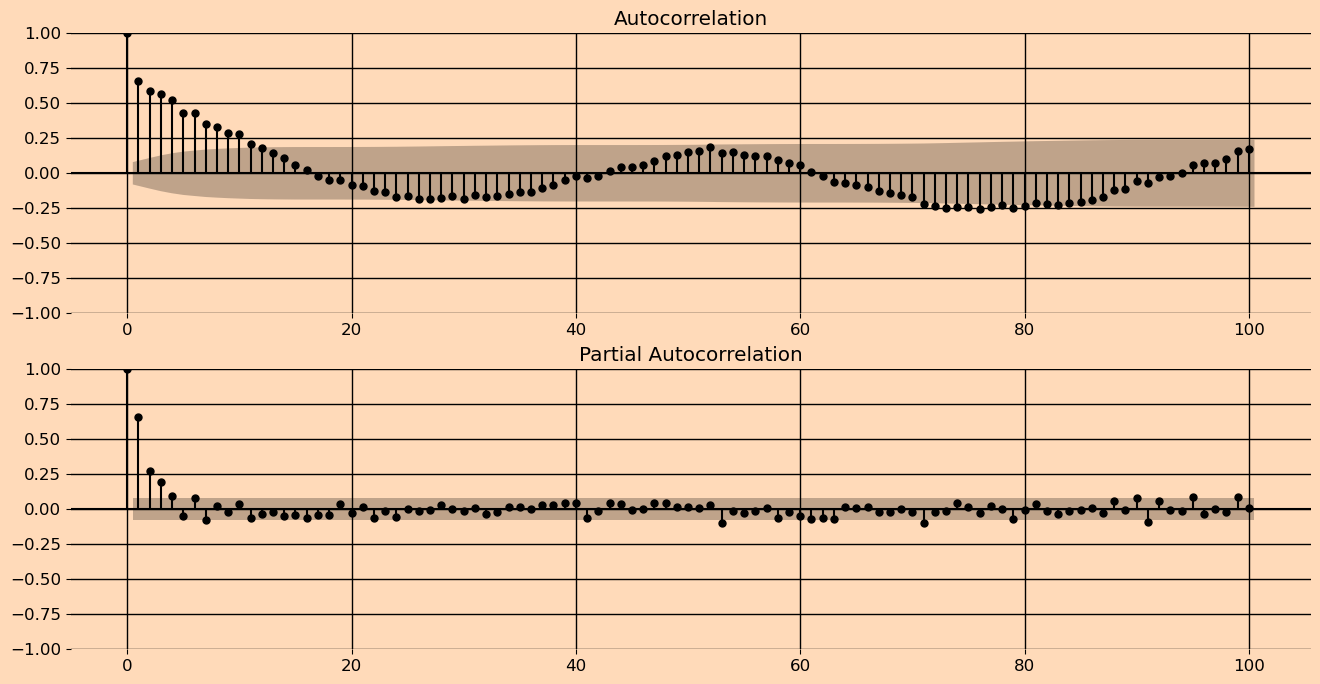

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [32]:
df1=df[['ds', 'y']]  #  'temperature', 'drainage_volume', 'river_hydrometry','rainfall'
df1["unique_id"]="1"


In [33]:
train = df1[df1.ds<='2020-03-05'] 
test=df1[(df1['ds'] > '2020-03-05')]

train.shape, test.shape

((584, 3), (16, 3))

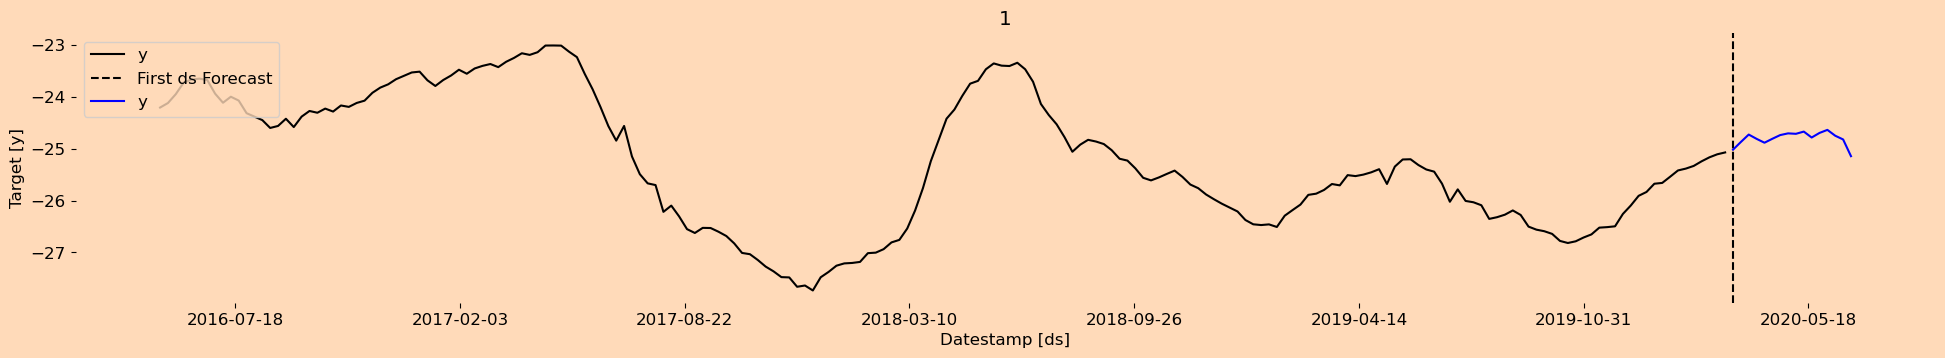

In [34]:
StatsForecast.plot(train, test,max_insample_length=200)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `AutoARIMA, MSTL` model, using the `AutoARIMA, MSTL` function. This model will help us forecast user demand in the next 30 daily.

In [35]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA,  SeasonalNaive,  MSTL, AutoETS,AutoCES, AutoTheta, SeasonalExponentialSmoothingOptimized,Holt, HoltWinters

In [36]:
season_length = 52 # Weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
MSTL(season_length=[52], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )]# model used to forecast trend ]

In [37]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='W', 
    n_jobs=-1)

## **Fit the Model**

In [38]:
sf.fit()

StatsForecast(models=[AutoARIMA,MSTL])

## **Predict Method**

In [39]:
Y_hat = sf.predict(horizon)
Y_hat["ds"]=Y_hat["ds"]+timedelta(days=4)
Y_hat

,ds,AutoARIMA,MSTL
unique_id,,,
1,2020-03-12,-25.037067,-25.158436
1,2020-03-19,-24.994854,-24.950298
1,2020-03-26,-24.973082,-24.762539
1,2020-04-02,-24.930706,-24.542089
1,2020-04-09,-24.914993,-24.431534
1,2020-04-16,-24.898268,-24.321419
1,2020-04-23,-24.882244,-24.199003
1,2020-04-30,-24.864927,-24.086779
1,2020-05-07,-24.887014,-24.219477


## **Forecasting Plot**

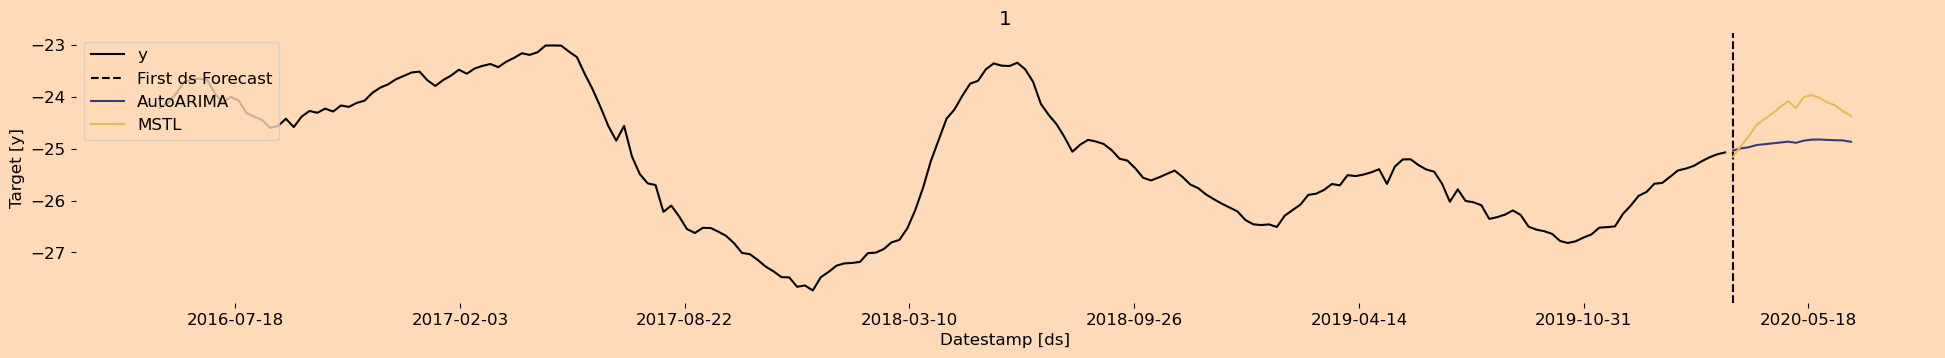

In [40]:
StatsForecast.plot(train, Y_hat, max_insample_length=200)

<a id="6"></a>
# **Evaluate the model**

In [41]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [42]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [44]:
print(evaluate_performace(train, test,Y_hat , models=['AutoARIMA','MSTL']))

               mase       mae      mape      rmse     smape
AutoARIMA  0.063164  0.125940  0.507982  0.146706  0.507004
MSTL       0.241305  0.481126  1.940624  0.532553  1.963717


<a id="7"></a>
# **Conclusion**

The results obtained, the AutoARIMA model has demonstrated good performance in forecasting groundwater depth. The values of MAE, MASE, RMSE and SMAPE indicate that the predictions are quite close to the actual values. However, MAPE shows a relatively high average absolute error rate, which may be due to outliers or the nature of the data. It is important to consider these results in the specific context of the application and perform additional analysis if necessary.

We can consider other aspects to improve the model:

- Include Exogenous variables to the model
- Train different models that can improve performance.
- Add prediction interval.
- Develop a Cross Validations.
- Train Machine Learning and Deep Learning Models.

Time series modeling applied to forecasting the groundwater depth of an aquifer offers a powerful tool for understanding and predicting changes in water levels over time. This is essential for sustainable water resource management and informed decision making in hydrological planning. By using advanced statistical and mathematical techniques, it is possible to obtain accurate forecasts that help improve groundwater management and conservation for the benefit of communities and the environment.

<a id="8"></a>
# **References**

1. [Arima model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Holt Winter Model](https://nixtla.github.io/statsforecast/docs/models/holtwinters.html)
3. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
4. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
5. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)